C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backe

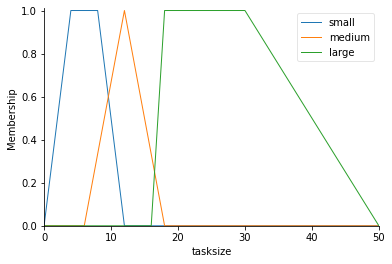

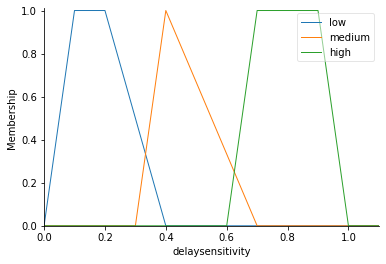

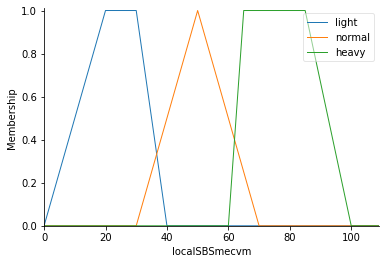

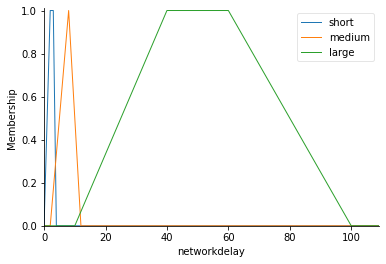

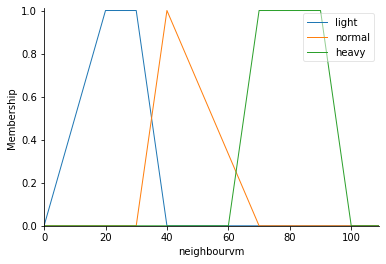

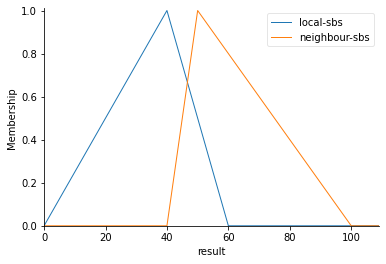

In [9]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
tasksize = ctrl.Antecedent(np.arange(0, 51, 1), 'tasksize')
delaysensitivity = ctrl.Antecedent(np.arange(0, 1.2, 0.1), 'delaysensitivity')
localSBSmecvm = ctrl.Antecedent( np.arange(0, 110, 1), 'localSBSmecvm')
networkdelay = ctrl.Antecedent( np.arange(0, 110, 1), 'networkdelay')
neighbourvm = ctrl.Antecedent( np.arange(0, 110, 1), 'neighbourvm')



result = ctrl.Consequent(np.arange(0, 110, 1), 'result')
#here membership function are of 2 types trapizoidal and triangular
tasksize['small'] = fuzz.trapmf(tasksize.universe, [0,4,8,12])
tasksize['medium']= fuzz.trimf(tasksize.universe, [6, 12, 18])
tasksize['large']= fuzz.trapmf(tasksize.universe, [16, 18,30, 50])

delaysensitivity['low'] = fuzz.trapmf(delaysensitivity.universe, [0,0.1, 0.2, 0.4])
delaysensitivity['medium'] = fuzz.trimf(delaysensitivity.universe, [0.3, 0.4, 0.7])
delaysensitivity['high'] = fuzz.trapmf(delaysensitivity.universe, [0.6, 0.7,0.9, 1.0])

localSBSmecvm['light'] = fuzz.trapmf(localSBSmecvm.universe, [0,20,30, 40])
localSBSmecvm['normal'] = fuzz.trimf(localSBSmecvm.universe,[30, 50, 70])
localSBSmecvm['heavy'] = fuzz.trapmf(localSBSmecvm.universe, [60, 65,85, 100])

networkdelay['short'] = fuzz.trapmf(networkdelay.universe, [0,2,3, 4])
networkdelay['medium'] = fuzz.trimf(networkdelay.universe, [2, 8, 12])
networkdelay['large'] = fuzz.trapmf(networkdelay.universe, [10, 40,60, 100])

neighbourvm['light'] = fuzz.trapmf(neighbourvm.universe, [0,20, 30, 40])
neighbourvm['normal'] = fuzz.trimf(neighbourvm.universe, [30, 40, 70])
neighbourvm['heavy'] = fuzz.trapmf(neighbourvm.universe, [60, 70,90, 100])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
#result membership function is in tringular
result['local-sbs'] = fuzz.trimf(result.universe,[0, 40, 60])
result['neighbour-sbs'] = fuzz.trimf(result.universe,  [40, 50, 100])

#to view the i/p and o/p membership function
tasksize.view()

delaysensitivity.view()

localSBSmecvm.view()

networkdelay.view()

neighbourvm.view()

result.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

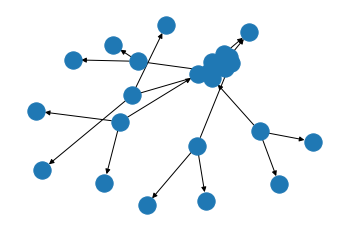

In [10]:
#rules
# 5 attributes and 3 lingustic terms so total rules=3^5=243

rule1 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'], result['local-sbs'])
rule2 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['normal'], result['local-sbs'])
rule3 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'], result['local-sbs'])
rule4 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['light'], result['local-sbs'])
rule5 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['normal'], result['local-sbs'])
rule6 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['heavy'], result['local-sbs'])
rule7 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'], result['local-sbs'])
rule8 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'], result['local-sbs'])
rule9 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'], result['local-sbs'])
rule10 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'], result['local-sbs'])
rule11 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'], result['local-sbs'])
rule12 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'], result['local-sbs'])
rule13 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal'] &  networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])
rule14 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule15 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm ['heavy'],result['local-sbs'])

rule16 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule17 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal']& networkdelay['large'] &neighbourvm['normal'],result['local-sbs'])

rule18 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['normal'] &  networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule19 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])
    
rule20 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule21 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule22 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule23 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule24 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule25 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule26 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule27 = ctrl.Rule(tasksize['small'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule28 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule29 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule30 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule31 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])
   
rule32 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule33 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule34 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule35 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])


rule36 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])
rule37 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule38 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])
     
rule39 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule40 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule41 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule42 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule43 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule44 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])
    
rule45 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule46 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule47 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule48 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule49 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule50 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])
 
rule51 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule52 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule53 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule54 = ctrl.Rule(tasksize['small'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule55 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule56 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])
    
rule57 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule58 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule59 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule60 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule61 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule62 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])
 
rule63 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule64 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule65 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule66 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule67 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule68 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])
    
rule69 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule70 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule71 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule72 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule73 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule74 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule75 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule76 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule77 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule78 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule79 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule80 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule81 = ctrl.Rule(tasksize['small'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule82 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule83 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short']  & neighbourvm['normal'],result['local-sbs'])

rule84 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule85 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule86 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule87 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule88 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule89 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule90 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule91 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule92 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule93 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule94 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule95 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule96 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule97 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule98 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule99 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule100 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['neighbour-sbs'])

rule101 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['neighbour-sbs'])

rule102 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule103 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule104 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule105 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule106 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule107 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule108 = ctrl.Rule(tasksize['medium'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule109 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule110 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule111 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule112 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule113 = ctrl.Rule( tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule114 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium'] &	neighbourvm['heavy'],result['local-sbs'])

rule115 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule116 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule117 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule118 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule119 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule120 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule121 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule122 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule123 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium']  & neighbourvm['heavy'],result['local-sbs'])

rule124 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule125 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])
rule126 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule127 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['neighbour-sbs'])

rule128 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['neighbour-sbs'])

rule129 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule130 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule131 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule132 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule133 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule134 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule135 = ctrl.Rule(tasksize['medium'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule136 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule137 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule138 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule139 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule140 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule141 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule142 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule143 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule144 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule145 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'],result['neighbour-sbs'])

rule146 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'],result['neighbour-sbs'])

rule147 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule148 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule149 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule150 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])
rule151 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule152 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule153 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule154 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule155 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule156 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule157 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule158 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule159 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule160 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule161 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule162 = ctrl.Rule(tasksize['medium'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule163 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule164 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule165 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule166 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule167 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule168 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule169 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule170 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule171 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule172 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule173 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule174 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule175 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule176 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule177 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule178 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule179 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule180 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule181 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['neighbour-sbs'])

rule182 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['neighbour-sbs'])

rule183 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule184 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule185 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule186 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule187 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule188 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule189 = ctrl.Rule(tasksize['large'] & delaysensitivity['low'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule190 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule191 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule192 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule193 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium']  & neighbourvm['light'],result['local-sbs'])

rule194 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium']  & neighbourvm['normal'],result['local-sbs'])

rule195 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['medium']  & neighbourvm['heavy'],result['local-sbs'])

rule196 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule197 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule198 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule199 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule200 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule201 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule202 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium']  & neighbourvm['light'],result['local-sbs'])

rule203 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium']  & neighbourvm['normal'],result['local-sbs'])

rule204 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['medium']  & neighbourvm['heavy'],result['local-sbs'])

rule205 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule206 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule207 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule208 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['neighbour-sbs'])

rule209 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['neighbour-sbs'])

rule210 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule211 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule212 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule213 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule214 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule215 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule216 = ctrl.Rule(tasksize['large'] & delaysensitivity['medium'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule217 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule218 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule219 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule220 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule221 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule222 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule223 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule224 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule225 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['light'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule226 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule227 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule228 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule229 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule230 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule231 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])
  
rule232 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule233 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule234 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['normal'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

rule235 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['light'],result['local-sbs'])

rule236 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['normal'],result['local-sbs'])

rule237 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['short'] & neighbourvm['heavy'],result['local-sbs'])

rule238 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['light'],result['local-sbs'])

rule239 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['normal'],result['local-sbs'])

rule240 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['medium'] & neighbourvm['heavy'],result['local-sbs'])

rule241 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['light'],result['local-sbs'])

rule242 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['normal'],result['local-sbs'])

rule243 = ctrl.Rule(tasksize['large'] & delaysensitivity['high'] & localSBSmecvm['heavy'] & networkdelay['large'] & neighbourvm['heavy'],result['local-sbs'])

#to see how rules are interconnected(in a fig.)                   
rule234.view()

In [11]:
#rules are given to contrl system which will evaluate according to (rules given)
result_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,rule40,rule41,rule42,rule43,rule44,rule45,rule46,rule47,rule48,rule49,rule50,rule51,rule52,rule53,rule54,rule55,rule56,rule57,rule58,rule59,rule60,rule61,rule62,rule63,rule64,rule65,rule66,rule67,rule68,rule69,rule70,rule71,rule72,rule73,rule74,rule75,rule76,rule77,rule78,rule79,rule80,rule81,rule82,rule83,rule84,rule85,rule86,rule87,rule88,rule89,rule90,rule91,rule92,rule93,rule94,rule95,rule96,rule97,rule98,rule99,rule100,rule101,rule102,rule103,rule104,rule105,rule106,rule107,rule108,rule109,rule110,rule111,rule112,rule113,rule114,rule115,rule116,rule117,rule118,rule119,rule120,rule121,rule122,rule123,rule124,rule125,rule126,rule127,rule128,rule129,rule130,rule131,rule132,rule133,rule134,rule135,rule136,rule137,rule138,rule139,rule140,rule141,rule142,rule143,rule144,rule145,rule146,rule147,rule148,rule149,rule150,rule151,rule152,rule153,rule154,rule155,rule156,rule157,rule158,rule159,rule160,rule161,rule162,rule163,rule164,rule165,rule166,rule167,rule168,rule169,rule170,rule171,rule172,rule173,rule174,rule175,rule176,rule177,rule178,rule179,rule180,rule181,rule182,rule183,rule184,rule185,rule186,rule187,rule188,rule189,rule190,rule191,rule192,rule193,rule194,rule195,rule196,rule197,rule198,rule199,rule200,rule201,rule202,rule203,rule204,rule205,rule206,rule207,rule208,rule209,rule210,rule211,rule212,rule213,rule214,rule215,rule216,rule217,rule218,rule219,rule220,rule221,rule222,rule223,rule224,rule225,rule226,rule227,rule228,rule229,rule230,rule231,rule232,rule233,rule234,rule235,rule236,rule237,rule238,rule239,rule240,rule241,rule242,rule243,])
fuzzification = ctrl.ControlSystemSimulation(result_ctrl)

In [12]:
#here inputs are given
fuzzification.input['tasksize'] = 9
fuzzification.input['delaysensitivity'] = 0.2
fuzzification.input['localSBSmecvm'] = 68
fuzzification.input['networkdelay'] = 2
fuzzification.input['neighbourvm'] = 43

In [13]:
#compute function invoked to compute  resulting value according to the inputs upon rule basis
fuzzification.compute()

47.25352112676056
offloading decision------->localedge offload


C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


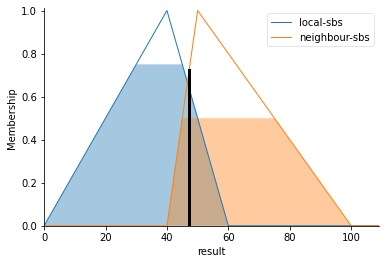

In [14]:
#defuzzified result

print(fuzzification.output['result'])
result.view(sim=fuzzification)

#offloading decision according to value

if((fuzzification.output['result'])<50):
    print("offloading decision------->localedge offload")
else:
    print("offloading decision------->neighbouredge offload")